# Assignment 2—Analysing and Predicting International Education Costs

## About Dataset
This Cost of International Education dataset has financial information for students who want to pursue higher education abroad. The dataset gives cost details about multiple countries, cities, and universities. The data set has factors like tuition fee, living expenses and key costs. This dataset has several features like tuition in USD, living-cost indices, rent, visa fees, insurance, and exchange rates. It gives an opportunity for a comparative analysis in different study programs, degree levels, and locations.



## Description of data in column
- Country -(string) ISO country name where the university is located (e.g. “Germany”, “Australia”).
- City -(string) City in which the institution sits (e.g. “Munich”, “Melbourne”).
- University -(string) Official name of the higher-education institution (e.g. “Technical University of Munich”).
- Program -(string) Specific course or major (e.g. “Master of Computer Science”, “MBA”).
- Level -(string) Degree level of the program: “Undergraduate”, “Master’s”, “PhD”, or other certifications.
- Duration_Years -(integer) Length of the program in years (e.g. 2 for a typical Master’s).
- Tuition_USD -(numeric) Total program tuition cost, converted into U.S. dollars for ease of comparison.
- Living_Cost_Index -(numeric) A normalised index (often based on global city indices) reflecting relative day-to-day living expenses (food, transport, utilities).
- Rent_USD -(numeric) Average monthly student accommodation rent in U.S. dollars.
- Visa_Fee_USD -(numeric) One-time visa application fee payable by international students, in U.S. dollars.
- Insurance_USD -(numeric) Annual health or student insurance cost in U.S. dollars, as required by many host countries.
- Exchange_Rate -(numeric) Local currency units per U.S. dollar at the time of data collection—vital for currency conversion and trend analysis if rates fluctuate.

## Source of Data for Analysis:

- Dataset Title: International_Education_Costs.csv

- Source: https://www.kaggle.com/datasets/adilshamim8/cost-of-international-education/data

## Objective

This project's goal is to analyse and model/visualise the costs for international education in different countries. So that students can take a firm and informed decision and plan their finances accordingly.In addition, it can help an educational consultant to advise on affordability, or a researcher who is studying global education economics. By using the dataset named as “International_Education_Costs.csv”, this study aims to:

- Find the most and least affordable study destinations so that students can choose as per their financial capabilities.

- Divide countries in different categories with similar cost profiles using clustering techniques.

- Predict the total cost of studying which is influenced by tuition fee, living expenses, and miscellaneous costs.

## Problem Statement
Most international students struggle with one common problem, which is how they are going to manage their finances when they are planning to study abroad. Since they have little data regarding this, they can't make an informed decision, and they relay heavily on random websites. These websites give incorrect data, and most of them do not provide any comparison with different countries. While quality of education is a necessity, the cost of education, living expenses, and additional costs is a critical factor to consider before selecting the destination of study.

### Key Questions

Question 1- How do different cost components impact total education expenses across countries and program levels, and which location or universities offer the most cost-effective options?

Question 2- What are different categories when clustering countries based on expenses?

Question 3- How accurately can we predict total education costs using individual cost components, and what factors have the strongest influence on total costs?

Question 4- Can we identify meaningful affordability clusters among programs and universities using unsupervised learning techniques?


## Step 1—Import all necessary libraries and load the data sheet

In [1]:
# Basic data manipulation and analysis
import pandas as pd
import numpy as np

# Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Machine learning libraries
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.cluster import KMeans
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Optional: Suppress warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load the dataset
df = pd.read_csv('International_Education_Costs.csv')


# Step 2—Data clean-up checklist
1. Initial Data Inspection
2. Handle Missing Values
3. Remove Duplicates
4. Fix Data Types
5. Handle Outliers
6. Standardize Text Data
7. Check and Handle Inconsistent Values
8. Validate Data Ranges


In [3]:
# 1. Initial Data Inspection
print("=== Initial Data Inspection ===")

print("Dataset Shape:", df.shape)

# Display the first few rows of the dataset
print("\nFirst few rows of the dataset:")
print(df.head())

=== Initial Data Inspection ===
Dataset Shape: (907, 12)

First few rows of the dataset:
     Country       City                      University  \
0        USA  Cambridge              Harvard University   
1         UK     London         Imperial College London   
2     Canada    Toronto           University of Toronto   
3  Australia  Melbourne         University of Melbourne   
4    Germany     Munich  Technical University of Munich   

                  Program   Level  Duration_Years  Tuition_USD  \
0        Computer Science  Master             2.0        55400   
1            Data Science  Master             1.0        41200   
2      Business Analytics  Master             2.0        38500   
3             Engineering  Master             2.0        42000   
4  Mechanical Engineering  Master             2.0          500   

   Living_Cost_Index  Rent_USD  Visa_Fee_USD  Insurance_USD  Exchange_Rate  
0               83.5      2200           160           1500           1.00  
1    

### Observation 1:
- The dataset has 907 raws and 12 columns.
- Review the data for initial steps.

In [4]:
# 2. Handle Missing Values
print("=== Missing Values Analysis ===")

print("\nMissing values in each column:")
print(df.isnull().sum())

=== Missing Values Analysis ===

Missing values in each column:
Country              0
City                 0
University           0
Program              0
Level                0
Duration_Years       0
Tuition_USD          0
Living_Cost_Index    0
Rent_USD             0
Visa_Fee_USD         0
Insurance_USD        0
Exchange_Rate        0
dtype: int64


### Observation 2:
- I have checked each column for missing values. The above cell shows that there are no missing values in any of the 12 columns.

In [5]:
# 3. Remove Duplicates
print("=== Duplicate Check ===")
duplicates = df.duplicated().sum()
print(f"\nNumber of duplicate rows: {duplicates}")

# Remove duplicates if they exist
df_cleaned = df.drop_duplicates().reset_index(drop=True)
print(f"Shape after removing duplicates: {df_cleaned.shape}")


=== Duplicate Check ===

Number of duplicate rows: 0
Shape after removing duplicates: (907, 12)


### Observation 3:
- Check the data for any duplicate values, but since there were no duplicate values, the size of the dataset remains unchanged.

In [6]:
# 4. Fix Data Types
print("=== Data Types Check ===")
print(df_cleaned.dtypes)

# Convert columns to appropriate data types
# Example for numeric columns that should be float:
numeric_columns = ['Tuition_USD', 'Living_Cost_Index', 'Rent_USD',
                  'Insurance_USD', 'Visa_Fee_USD', 'Exchange_Rate']

for col in numeric_columns:
    df_cleaned[col] = pd.to_numeric(df_cleaned[col], errors='coerce')


=== Data Types Check ===
Country               object
City                  object
University            object
Program               object
Level                 object
Duration_Years       float64
Tuition_USD            int64
Living_Cost_Index    float64
Rent_USD               int64
Visa_Fee_USD           int64
Insurance_USD          int64
Exchange_Rate        float64
dtype: object


### Observation 4
Checked for data type for all columns and fixed all cost/index columns to remove any value which is not numeric to ensure that all numerical columns are properly formatted.

- Columns (Country, City, University, Program, Level) with string values can be used for categorisation of the data.
- Columns (Tuition_USD, Living_Cost_Index, Rent_USD, Insurance_USD, Visa_Fee_USD, Exchange_Rate) with numerical values can be used for clustering.


In [7]:
# find the outliers
def detect_outliers_iqr(df, columns):
    """
    Detect outliers using the IQR method for specified columns
    """
    # First, let's print available columns to help debug
    print("Available columns in DataFrame:", df.columns.tolist())

    outliers_info = {}

    # Check if columns exist before processing
    existing_columns = [col for col in columns if col in df.columns]
    if len(existing_columns) != len(columns):
        missing_columns = set(columns) - set(existing_columns)
        print(f"Warning: Some columns were not found: {missing_columns}")

    for column in existing_columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1

        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]

        outliers_info[column] = {
            'count': len(outliers),
            'indices': outliers.index.tolist(),
            'values': outliers[column].tolist(),
            'lower_bound': lower_bound,
            'upper_bound': upper_bound
        }

    return outliers_info

# Define columns to analyze (you should verify these names match your DataFrame)
cost_columns = ['Tuition_USD', 'Living_Cost_Index', 'Rent_USD',
                'Visa_Fee_USD', 'Insurance_USD']

# Detect outliers with added error handling
outliers = detect_outliers_iqr(df, cost_columns)

# Print outlier information
for column, info in outliers.items():
    print(f"\nOutliers in {column}:")
    print(f"Number of outliers: {info['count']}")
    print(f"Outlier values: {info['values']}")

Available columns in DataFrame: ['Country', 'City', 'University', 'Program', 'Level', 'Duration_Years', 'Tuition_USD', 'Living_Cost_Index', 'Rent_USD', 'Visa_Fee_USD', 'Insurance_USD', 'Exchange_Rate']

Outliers in Tuition_USD:
Number of outliers: 0
Outlier values: []

Outliers in Living_Cost_Index:
Number of outliers: 20
Outlier values: [100.0, 100.0, 122.4, 119.8, 116.5, 114.3, 112.1, 110.4, 108.9, 107.8, 31.8, 30.5, 31.2, 29.8, 28.5, 27.8, 31.8, 30.5, 29.8, 100.0]

Outliers in Rent_USD:
Number of outliers: 3
Outlier values: [2500, 2500, 2500]

Outliers in Visa_Fee_USD:
Number of outliers: 93
Outlier values: [485, 485, 485, 485, 485, 485, 485, 485, 485, 485, 485, 485, 485, 485, 485, 485, 490, 490, 490, 490, 490, 490, 490, 490, 490, 490, 490, 490, 490, 490, 490, 490, 490, 490, 490, 490, 490, 490, 490, 490, 490, 490, 490, 490, 490, 490, 490, 490, 490, 490, 490, 490, 490, 490, 490, 490, 490, 490, 490, 490, 490, 490, 490, 490, 490, 490, 485, 485, 485, 485, 485, 485, 485, 485, 485, 485, 4

#### Outlier observation:
We found all the outliers in the data set. But our whole purpose of this project is to calulate the total cost of each and every university in this dataset, so if we remove these outliers, we won't be able to give the total cost for those universities which are either too expensive or too cheap. that's why I have decided to not remove any outliers from this data set.

In [8]:
# Display unique values in categorical columns
print("\nUnique values in categorical columns:")
print("\nNumber of unique countries:", df['Country'].nunique())
print("\nNumber of unique cities:", df['City'].nunique())
print("\nNumber of unique programs:", df['Program'].nunique())
print("\nNumber of unique universities:", df['University'].nunique())
print("\nProgram levels:", df['Level'].unique())



Unique values in categorical columns:

Number of unique countries: 71

Number of unique cities: 556

Number of unique programs: 92

Number of unique universities: 622

Program levels: ['Master' 'Bachelor' 'PhD']


## Observation 5:
Summary of the dataset:
- We are dealing with data from 71 countries which include 622 universities from 556 different cities, and there are 92 different programs taught in these universities.

In [9]:
# Distribution of programs by level
print("\nDistribution of programs by level:")
print(df['Level'].value_counts())


Distribution of programs by level:
Level
Master      451
Bachelor    297
PhD         159
Name: count, dtype: int64


In [10]:

# Top 10 countries by number of programs
print("\nTop 10 countries by number of programs:")
print(df['Country'].value_counts().head(10))



Top 10 countries by number of programs:
Country
UK             93
Australia      86
USA            78
Canada         76
Germany        33
France         27
South Korea    23
Netherlands    21
Switzerland    20
Singapore      18
Name: count, dtype: int64


In [11]:
# Average tuition by program level
print("\nAverage tuition by program level:")
print(df.groupby('Level')['Tuition_USD'].mean())


Average tuition by program level:
Level
Bachelor    19792.693603
Master      14521.995565
PhD         17129.559748
Name: Tuition_USD, dtype: float64


## Step 3—Preprocessing

In [12]:
# Estimate monthly living cost using index and rent (assume base of $1000)
df['Living_Cost_USD'] = df['Living_Cost_Index'] * 10  # base factor

# Multiply by study duration (years to months)
df['Living_Cost_Total'] = df['Living_Cost_USD'] * 12 * df['Duration_Years']
df['Rent_Total'] = df['Rent_USD'] * 12 * df['Duration_Years']


### Observation 6

- To calculate the total cost, we need total living cost and total rent for the duration of the whole program.

** From here onwards, we will use Living cost total and rent total. **

In [13]:
# Summary statistics for numerical columns
print("Summary statistics for cost-related columns:")
cost_columns = ['Tuition_USD', 'Living_Cost_Total', 'Rent_Total','Visa_Fee_USD', 'Insurance_USD']
print(df[cost_columns].describe())

Summary statistics for cost-related columns:
        Tuition_USD  Living_Cost_Total     Rent_Total  Visa_Fee_USD  \
count    907.000000         907.000000     907.000000    907.000000   
mean   16705.016538       21826.941566   33295.832415    211.396913   
std    16582.385275        8629.109444   23250.906808    143.435740   
min        0.000000        6672.000000    3840.000000     40.000000   
25%     2850.000000       15792.000000   16800.000000    100.000000   
50%     7500.000000       19560.000000   27600.000000    160.000000   
75%    31100.000000       27348.000000   43200.000000    240.000000   
max    62000.000000       57504.000000  138000.000000    490.000000   

       Insurance_USD  
count     907.000000  
mean      700.077178  
std       320.374875  
min       200.000000  
25%       450.000000  
50%       650.000000  
75%       800.000000  
max      1500.000000  


In [14]:
df['Total_Cost'] = (
    df['Tuition_USD']
    + df['Living_Cost_Total']
    + df['Rent_Total']
    + df['Visa_Fee_USD']
    + df['Insurance_USD']
)

In [15]:
df.head()

,Country,City,University,Program,Level,Duration_Years,Tuition_USD,Living_Cost_Index,Rent_USD,Visa_Fee_USD,Insurance_USD,Exchange_Rate,Living_Cost_USD,Living_Cost_Total,Rent_Total,Total_Cost
0,USA,Cambridge,Harvard University,Computer Science,Master,2.0,55400,83.5,2200,160,1500,1.00,835.0,20040.0,52800.0,129900.0
1,UK,London,Imperial College London,Data Science,Master,1.0,41200,75.8,1800,485,800,0.79,758.0,9096.0,21600.0,73181.0
2,Canada,Toronto,University of Toronto,Business Analytics,Master,2.0,38500,72.5,1600,235,900,1.35,725.0,17400.0,38400.0,95435.0
3,Australia,Melbourne,University of Melbourne,Engineering,Master,2.0,42000,71.2,1400,450,650,1.52,712.0,17088.0,33600.0,93788.0
4,Germany,Munich,Technical University of Munich,Mechanical Engineering,Master,2.0,500,70.5,1100,75,550,0.92,705.0,16920.0,26400.0,44445.0


### Observation 7
Before we moved ahead, we needed total cost for dataset, so I created a dataframe in pd with the total cost for each raw.

## Step—4 Data preparation

In [16]:
# Split the data into features (X) and target (y)
X = df[['Tuition_USD', 'Living_Cost_Total', 'Rent_Total', 'Visa_Fee_USD', 'Insurance_USD']]
y = df['Total_Cost']

# First split: 75% train, 25% remainder
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.25, random_state=42)

# Second split: Split the remaining 25% into validation and test sets (50% each, resulting in 12.5% of the original data)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)


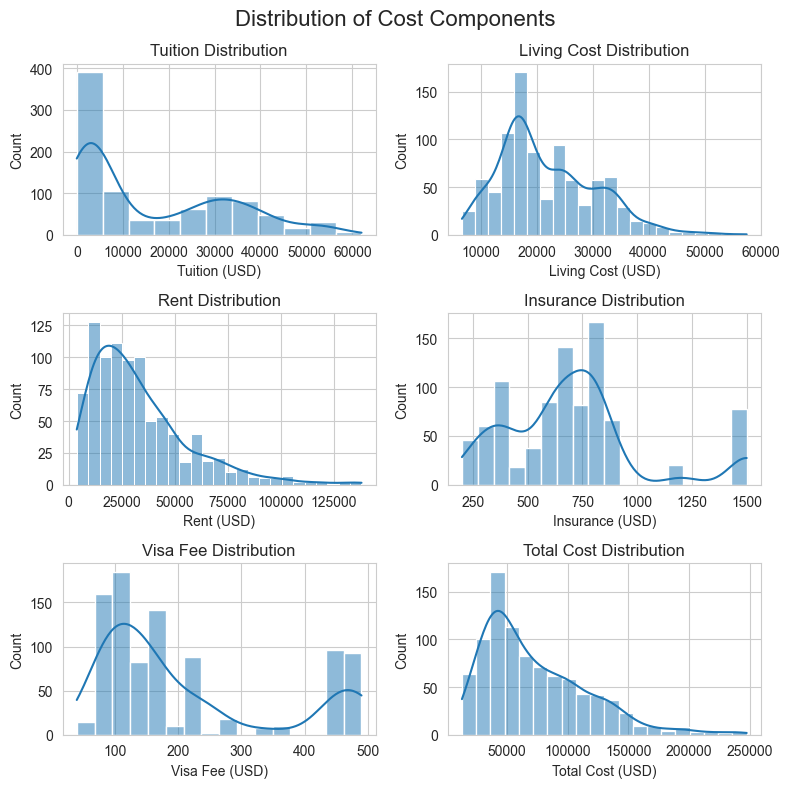

In [17]:
# Create subplots for univariate analysis of cost components
fig, axes = plt.subplots(3, 2, figsize=(8, 8))
fig.suptitle('Distribution of Cost Components', fontsize=16)

# Plot histograms with KDE for each cost component
sns.histplot(data=df, x='Tuition_USD', kde=True, ax=axes[0, 0])
axes[0, 0].set_title('Tuition Distribution')
axes[0, 0].set_xlabel('Tuition (USD)')

sns.histplot(data=df, x='Living_Cost_Total', kde=True, ax=axes[0, 1])
axes[0, 1].set_title('Living Cost Distribution')
axes[0, 1].set_xlabel('Living Cost (USD)')

sns.histplot(data=df, x='Rent_Total', kde=True, ax=axes[1, 0])
axes[1, 0].set_title('Rent Distribution')
axes[1, 0].set_xlabel('Rent (USD)')

sns.histplot(data=df, x='Insurance_USD', kde=True, ax=axes[1, 1])
axes[1, 1].set_title('Insurance Distribution')
axes[1, 1].set_xlabel('Insurance (USD)')

sns.histplot(data=df, x='Visa_Fee_USD', kde=True, ax=axes[2, 0])
axes[2, 0].set_title('Visa Fee Distribution')
axes[2, 0].set_xlabel('Visa Fee (USD)')

sns.histplot(data=df, x='Total_Cost', kde=True, ax=axes[2, 1])
axes[2, 1].set_title('Total Cost Distribution')
axes[2, 1].set_xlabel('Total Cost (USD)')

plt.tight_layout()
plt.show()


### Observations 8: univariate analysis: (All values are in USD)

- **Tuition Distribution:**

   - Around 500 universities have tuition fee less than or equal to 10 K.
      - A few universities have tuition fee more than 50 K.

- **Living Cost Distribution:**
  Most values fall between 15 K and 30 K.

- **Rent Distribution:**
  Rent costs are ranging between 10 K and 40 K, with some extreme outliers beyond \$100,000.

- **Insurance Distribution:**
 Peaks between 400–900. Some countries have unusually high values (~1,500).

- **Visa Fee Distribution:**
  General values are between 100 and 250. Few countries charge significantly more (up to 500).

- **Total Cost Distribution:**
  Most programs fall in the 40K–100K range. A small number of programs exceed 200 K, largely influenced by high tuition, rent, and living costs.

---

These distributions help confirm that cost features are unevenly spread, which can influence model choice (e.g. models that can handle non-normal, skewed data like trees or neural networks).


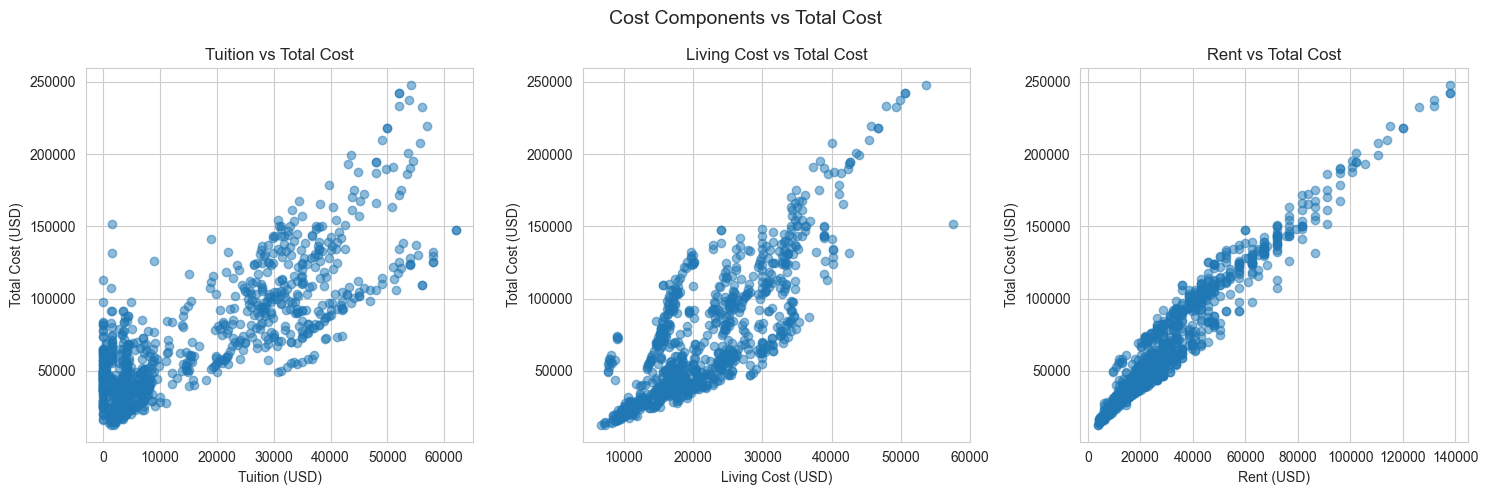

In [18]:
# Create subplots for cost relationships
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
fig.suptitle('Cost Components vs Total Cost', fontsize=14)

# Tuition vs Total Cost
axes[0].scatter(df['Tuition_USD'], df['Total_Cost'], alpha=0.5)
axes[0].set_title('Tuition vs Total Cost')
axes[0].set_xlabel('Tuition (USD)')
axes[0].set_ylabel('Total Cost (USD)')

# Living Cost vs Total Cost
axes[1].scatter(df['Living_Cost_Total'], df['Total_Cost'], alpha=0.5)
axes[1].set_title('Living Cost vs Total Cost')
axes[1].set_xlabel('Living Cost (USD)')
axes[1].set_ylabel('Total Cost (USD)')

# Rent vs Total Cost
axes[2].scatter(df['Rent_Total'], df['Total_Cost'], alpha=0.5)
axes[2].set_title('Rent vs Total Cost')
axes[2].set_xlabel('Rent (USD)')
axes[2].set_ylabel('Total Cost (USD)')

plt.tight_layout()
plt.show()


### Observations 9: Bivariate Analysis – Cost Components vs Total Cost

- **Tuition vs Total Cost:**
    - A clear **positive linear relationship**
    - There is a spread and variation
    - There are clusters at lower tuition levels this means variability in non-tuition components (e.g. rent, duration).

- **Living Cost vs Total Cost:**
  - A strong linear trend is visible.
  - Programs with higher living costs tend to have higher total costs.
  - The spread indicates the relation with duration and rent.

- **Rent vs Total Cost:**
  - The **most tightly linear** of all.
  - The points align closely along a diagonal line
  - Rent is a **strong and consistent predictor** of total cost — especially since it's scaled with duration.

---

These plots confirm that **tuition, living cost, and rent** all have strong positive correlations with total cost. Among them, **rent shows the most linear and consistent impact**, likely due to its compounding effect over time (months × years).


## Step—5 Clustering Analysis

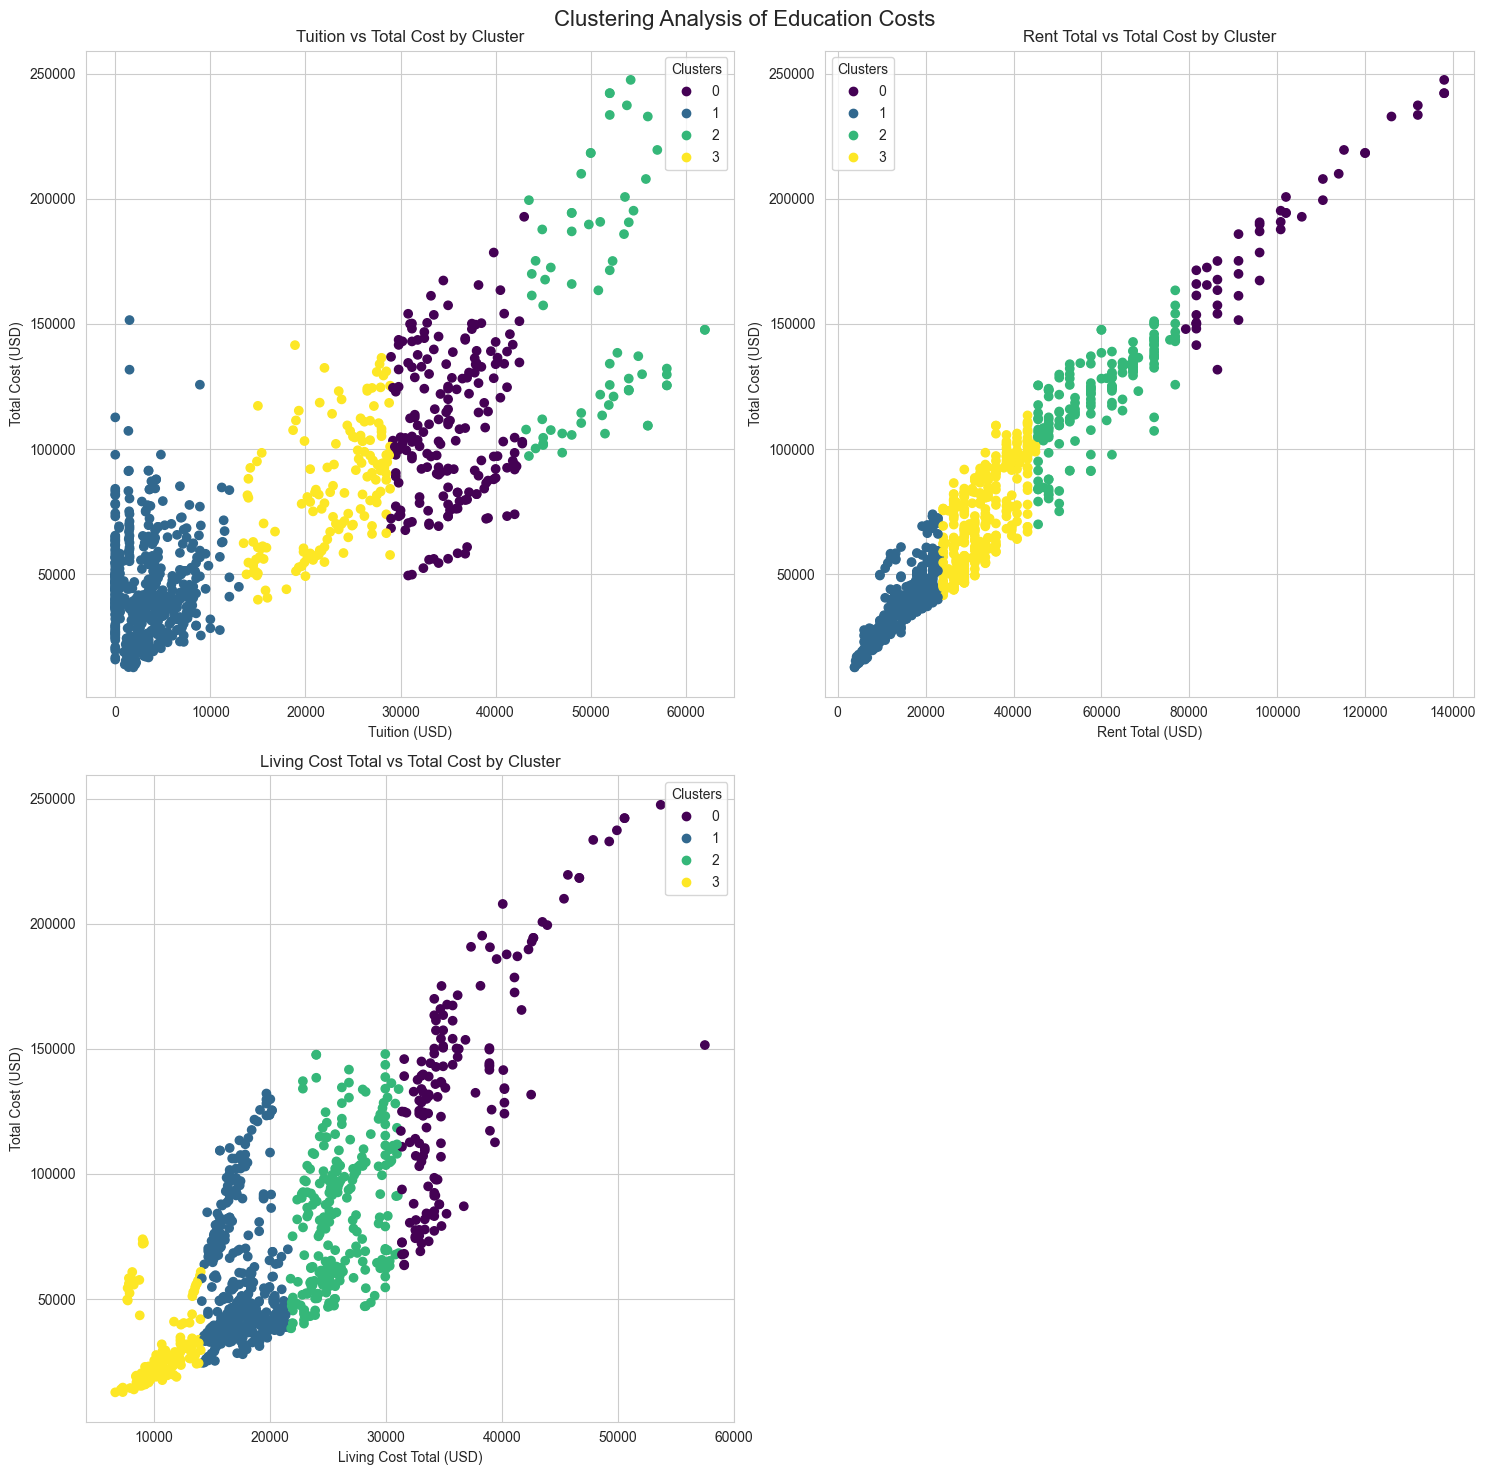


Cluster sizes:
Rent clusters:
Cluster_rent
0     47
1    376
2    168
3    316
Name: count, dtype: int64

Living cost clusters:
Cluster_living
0    152
1    374
2    240
3    141
Name: count, dtype: int64

Tuition clusters:
Cluster_tuition
0    192
1    504
2     67
3    144
Name: count, dtype: int64


In [19]:
# Select features for clustering
X_cluster_tuition = df['Tuition_USD'].values.reshape(-1, 1)
X_cluster_living = df['Living_Cost_Total'].values.reshape(-1, 1)
X_cluster_rent = df['Rent_Total'].values.reshape(-1, 1)

# Check for missing values
if df[['Tuition_USD', 'Living_Cost_Total', 'Rent_Total']].isna().any().any():
    print("Warning: Missing values detected in the features")

# Standardise features with separate scalers
scaler_tuition = StandardScaler()
scaler_living = StandardScaler()
scaler_rent = StandardScaler()

X_scaled_tuition = scaler_tuition.fit_transform(X_cluster_tuition)
X_scaled_living = scaler_living.fit_transform(X_cluster_living)
X_scaled_rent = scaler_rent.fit_transform(X_cluster_rent)

# Apply KMeans clustering
kmeans = KMeans(n_clusters=4, random_state=42)
df['Cluster_tuition'] = kmeans.fit_predict(X_scaled_tuition)
df['Cluster_living'] = kmeans.fit_predict(X_scaled_living)
df['Cluster_rent'] = kmeans.fit_predict(X_scaled_rent)

# Create a figure with subplots (2x2 grid, but we'll use only 3)
fig, axes = plt.subplots(2, 2, figsize=(15, 15))
fig.suptitle('Clustering Analysis of Education Costs', fontsize=16)

# Plot Tuition vs Total Cost
scatter1 = axes[0, 0].scatter(df['Tuition_USD'], df['Total_Cost'], c=df['Cluster_tuition'], cmap='viridis')
axes[0, 0].set_xlabel('Tuition (USD)')
axes[0, 0].set_ylabel('Total Cost (USD)')
axes[0, 0].set_title('Tuition vs Total Cost by Cluster')
axes[0, 0].legend(*scatter1.legend_elements(), title="Clusters")

# Plot Rent vs Total Cost
scatter2 = axes[0, 1].scatter(df['Rent_Total'], df['Total_Cost'], c=df['Cluster_rent'], cmap='viridis')
axes[0, 1].set_xlabel('Rent Total (USD)')
axes[0, 1].set_ylabel('Total Cost (USD)')
axes[0, 1].set_title('Rent Total vs Total Cost by Cluster')
axes[0, 1].legend(*scatter2.legend_elements(), title="Clusters")

# Plot Living Cost vs Total Cost
scatter3 = axes[1, 0].scatter(df['Living_Cost_Total'], df['Total_Cost'], c=df['Cluster_living'], cmap='viridis')
axes[1, 0].set_xlabel('Living Cost Total (USD)')
axes[1, 0].set_ylabel('Total Cost (USD)')
axes[1, 0].set_title('Living Cost Total vs Total Cost by Cluster')
axes[1, 0].legend(*scatter3.legend_elements(), title="Clusters")

# Remove the empty subplot
fig.delaxes(axes[1, 1])

plt.tight_layout()
plt.show()

# Print cluster sizes with labels
print("\nCluster sizes:")
print("Rent clusters:")
print(df['Cluster_rent'].value_counts().sort_index())
print("\nLiving cost clusters:")
print(df['Cluster_living'].value_counts().sort_index())
print("\nTuition clusters:")
print(df['Cluster_tuition'].value_counts().sort_index())

In [20]:
# Import silhouette score
from sklearn.metrics import silhouette_score

# Calculate silhouette score for the clustering
silhouette_avg_rent = silhouette_score(X_scaled_rent, kmeans.labels_)
silhouette_avg_living = silhouette_score(X_scaled_living, kmeans.labels_)
silhouette_avg_tuition = silhouette_score(X_scaled_tuition, kmeans.labels_)

print(f'\nAvg Silhouette_rent: {silhouette_avg_rent:.3f}')
print(f'Avg Silhouette_living: {silhouette_avg_living:.3f}')
print(f'Avg Silhouette_tuttion: {silhouette_avg_tuition:.3f}')




Avg Silhouette_rent: 0.552
Avg Silhouette_living: 0.116
Avg Silhouette_tuttion: 0.023


#### Observation 10: Clustering Based on Core Cost Components

**KMeans clustering** using the three major cost drivers:
- `Tuition_USD`
- `Living_Cost_Total`
- `Rent_Total`

They have the strongest influence on total education cost.

Clustering revealed three distinct groups in the dataset **(Tuition)**:
- **Cluster 0**: Mid-Cost programs
- **Cluster 1**: Low-cost programs
- **Cluster 2**: High-Cost Programs
- **Cluster 3**: Mid-Cost programs

Clustering revealed three distinct groups in the dataset **(Living)**:
- **Cluster 0**: High-Cost Programs
- **Cluster 1**: Low-cost programs
- **Cluster 2**: Mid-Cost programs
- **Cluster 3**: Mid-Cost programs

Clustering revealed three distinct groups in the dataset **(Rent)**:
- **Cluster 0**: High-Cost Programs
- **Cluster 1**: Mid-Cost programs
- **Cluster 2**: Mid-Cost programs
- **Cluster 3**: Low-cost programs

The silhouette score for rent is highest that means the accuracy of that clustering is higher than other clustering.

A scatter plot (coloured by cluster) visually confirms the separation between these affordability groups.

These clusters provide a valuable lens to interpret global education costs and can be used to:
- Add a **'Cluster' feature** to predictive models
- Analyze models **per cluster** for deeper insights

In [21]:
df.head()

,Country,City,University,Program,Level,Duration_Years,Tuition_USD,Living_Cost_Index,Rent_USD,Visa_Fee_USD,Insurance_USD,Exchange_Rate,Living_Cost_USD,Living_Cost_Total,Rent_Total,Total_Cost,Cluster_tuition,Cluster_living,Cluster_rent
0,USA,Cambridge,Harvard University,Computer Science,Master,2.0,55400,83.5,2200,160,1500,1.00,835.0,20040.0,52800.0,129900.0,2,1,2
1,UK,London,Imperial College London,Data Science,Master,1.0,41200,75.8,1800,485,800,0.79,758.0,9096.0,21600.0,73181.0,0,3,1
2,Canada,Toronto,University of Toronto,Business Analytics,Master,2.0,38500,72.5,1600,235,900,1.35,725.0,17400.0,38400.0,95435.0,0,1,3
3,Australia,Melbourne,University of Melbourne,Engineering,Master,2.0,42000,71.2,1400,450,650,1.52,712.0,17088.0,33600.0,93788.0,0,1,3
4,Germany,Munich,Technical University of Munich,Mechanical Engineering,Master,2.0,500,70.5,1100,75,550,0.92,705.0,16920.0,26400.0,44445.0,1,1,3


## Step 6 - Training Linear Regression Model
Let's train a baseline linear regression model to predict total education costs based on the prepared features.

In [22]:
# Scale the features using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

In [23]:
# Train Linear Regression model
lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)

# Make predictions on a validation set
y_pred_val = lr_model.predict(X_val_scaled)

# Calculate metrics
val_r2 = r2_score(y_val, y_pred_val)
val_mse = mean_squared_error(y_val, y_pred_val)
val_rmse = np.sqrt(val_mse)
val_mae = mean_absolute_error(y_val, y_pred_val)

print("Validation Metrics:")
print(f"R² Score: {val_r2:.4f}")
print(f"RMSE: ${val_rmse:,.2f}")
print(f"MAE: ${val_mae:,.2f}")

Validation Metrics:
R² Score: 1.0000
RMSE: $0.00
MAE: $0.00


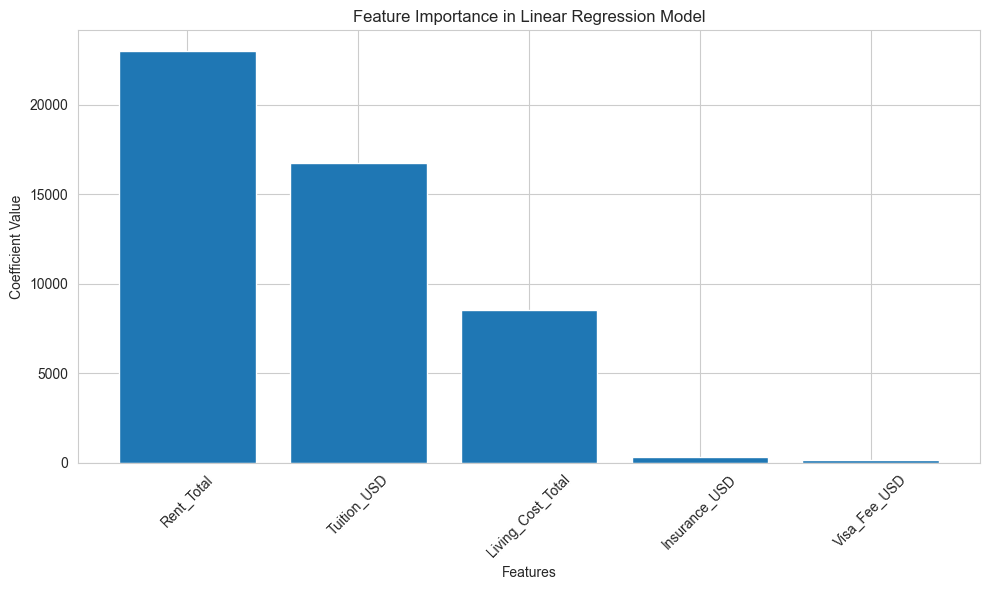

In [24]:
# Get feature importance
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': lr_model.coef_
})
feature_importance['Abs_Coefficient'] = abs(feature_importance['Coefficient'])
feature_importance = feature_importance.sort_values('Abs_Coefficient', ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.bar(feature_importance['Feature'], feature_importance['Coefficient'])
plt.xticks(rotation=45)
plt.title('Feature Importance in Linear Regression Model')
plt.xlabel('Features')
plt.ylabel('Coefficient Value')
plt.tight_layout()
plt.show()

### Observation 11: Model Performance Analysis
The R² score = 1 shows how our features explain variance in total costs, and our result shows a perfect fit for the data set.
RMSE and MAE show that the average prediction error in USD is zero.

#### Feature Importance
The bar plot shows Rent total has the strongest influence on predicting total costs.
Larger coefficient magnitudes (positive or negative) indicate a stronger influence on the predictions.


### Step 7 - Polynomial Regression

In [25]:
# Import PolynomialFeatures
from sklearn.preprocessing import PolynomialFeatures

# Create polynomial features with degree=2
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train_scaled)
X_val_poly = poly.transform(X_val_scaled)

# Train polynomial regression model
poly_model = LinearRegression()
poly_model.fit(X_train_poly, y_train)

# Make predictions on validation set
y_pred_val_poly = poly_model.predict(X_val_poly)

# Calculate metrics
val_r2_poly = r2_score(y_val, y_pred_val_poly)
val_mse_poly = mean_squared_error(y_val, y_pred_val_poly)
val_rmse_poly = np.sqrt(val_mse_poly)
val_mae_poly = mean_absolute_error(y_val, y_pred_val_poly)

print("Polynomial Regression Metrics:")
print(f"R² Score: {val_r2_poly:.4f}")
print(f"RMSE: ${val_rmse_poly:,.2f}")
print(f"MAE: ${val_mae_poly:,.2f}")

print("\nComparison with Linear Regression:")
print(f"Linear R²: {val_r2:.4f} vs Polynomial R²: {val_r2_poly:.4f}")
print(f"Linear RMSE: ${val_rmse:,.2f} vs Polynomial RMSE: ${val_rmse_poly:,.2f}")
print(f"Linear MAE: ${val_mae:,.2f} vs Polynomial MAE: ${val_mae_poly:,.2f}")


Polynomial Regression Metrics:
R² Score: 1.0000
RMSE: $0.00
MAE: $0.00

Comparison with Linear Regression:
Linear R²: 1.0000 vs Polynomial R²: 1.0000
Linear RMSE: $0.00 vs Polynomial RMSE: $0.00
Linear MAE: $0.00 vs Polynomial MAE: $0.00


### Observation 12: Model Comparison: Linear vs Polynomial Regression

Both Linear and Polynomial Regression models achieved perfect prediction performance:
- R² Score: 1.000
- RMSE: $0.00
- MAE: $0.00

#### Why This Happened:
The `Total_Cost` variable is a direct sum of the core cost components (`Tuition`, `Rent`, `Living_Cost`, etc.). This makes the relationship perfectly linear.

#### Conclusion:
- Polynomial Regression offers no added benefit in this case since the model has perfect fit from Linear Regression.
- This outcome validates that a linear model is fully appropriate and optimal for this prediction task.

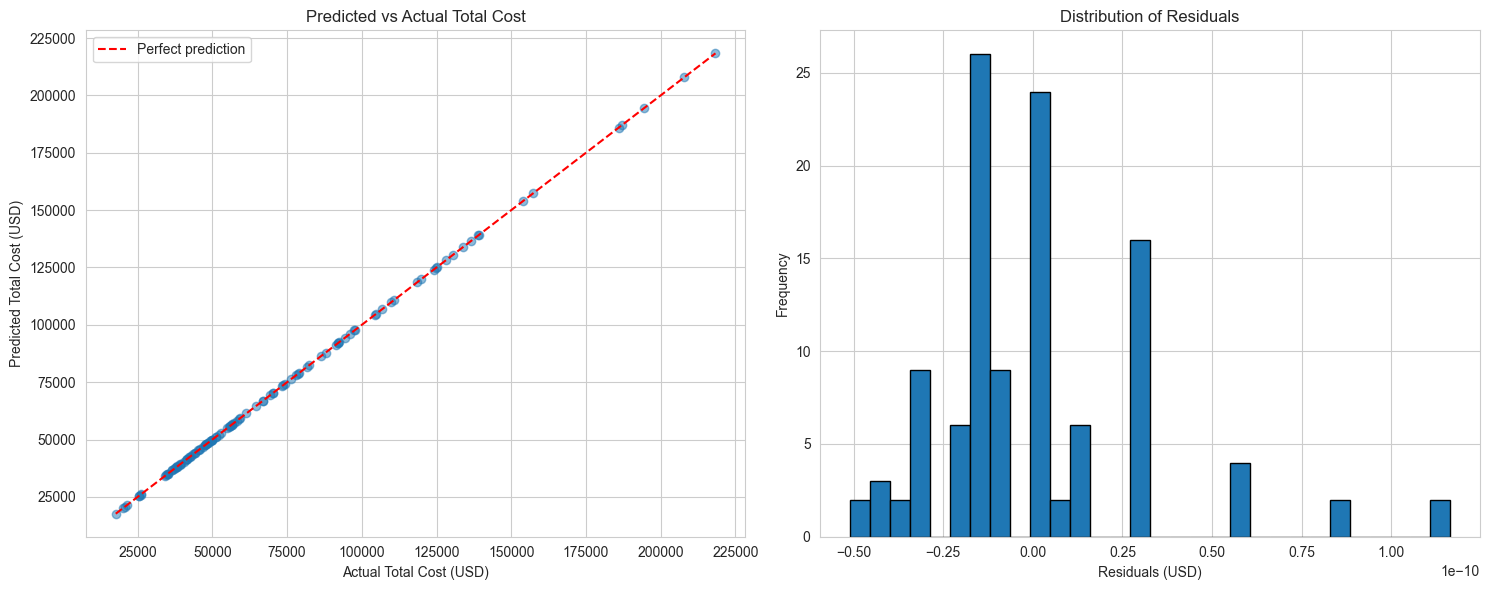

In [26]:
# Create figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Scatter plot of predicted vs actual values
ax1.scatter(y_val, y_pred_val, alpha=0.5)
ax1.plot([y_val.min(), y_val.max()], [y_val.min(), y_val.max()], 'r--', label='Perfect prediction')
ax1.set_xlabel('Actual Total Cost (USD)')
ax1.set_ylabel('Predicted Total Cost (USD)')
ax1.set_title('Predicted vs Actual Total Cost')
ax1.legend()

# Calculate and plot residuals histogram
residuals = y_val - y_pred_val
ax2.hist(residuals, bins=30, edgecolor='black')
ax2.set_xlabel('Residuals (USD)')
ax2.set_ylabel('Frequency')
ax2.set_title('Distribution of Residuals')

plt.tight_layout()
plt.show()


### Observation 13: Residual Analysis – Model Error Diagnostics

**Residuals** represent the difference between actual and predicted values:

Residual = Actual Total Cost − Predicted Total Cost**

#### Interpretation:

- The **residuals in our model are close to zero**, indicating that the model's predictions are nearly perfect.
- The residuals are **centered around 0** and show **no pattern**, confirming that the model is unbiased and captures the relationship accurately.
- This supports our earlier metrics (R² = 1.000, MAE = 0.00), showing that Linear Regression perfectly fits the data.

### Step 7 - Decision Tree Regressor

In [27]:
# Import DecisionTreeRegressor
from sklearn.tree import DecisionTreeRegressor

# Train DecisionTreeRegressor model
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train_scaled, y_train)

# Make predictions on validation set
y_pred_val_dt = dt_model.predict(X_val_scaled)

# Calculate metrics
val_r2_dt = r2_score(y_val, y_pred_val_dt)
val_mse_dt = mean_squared_error(y_val, y_pred_val_dt)
val_rmse_dt = np.sqrt(val_mse_dt)
val_mae_dt = mean_absolute_error(y_val, y_pred_val_dt)

print("Decision Tree Metrics:")
print(f"R² Score: {val_r2_dt:.4f}")
print(f"RMSE: ${val_rmse_dt:,.2f}")
print(f"MAE: ${val_mae_dt:,.2f}")

print("\nComparison of All Models:")
print(f"Linear Regression R²: {val_r2:.4f}")
print(f"Polynomial Regression R²: {val_r2_poly:.4f}")
print(f"Decision Tree R²: {val_r2_dt:.4f}")
print(f"\nLinear Regression RMSE: ${val_rmse:,.2f}")
print(f"Polynomial Regression RMSE: ${val_rmse_poly:,.2f}")
print(f"Decision Tree RMSE: ${val_rmse_dt:,.2f}")
print(f"\nLinear Regression MAE: ${val_mae:,.2f}")
print(f"Polynomial Regression MAE: ${val_mae_poly:,.2f}")
print(f"Decision Tree MAE: ${val_mae_dt:,.2f}")


Decision Tree Metrics:
R² Score: 0.9928
RMSE: $3,603.92
MAE: $2,123.26

Comparison of All Models:
Linear Regression R²: 1.0000
Polynomial Regression R²: 1.0000
Decision Tree R²: 0.9928

Linear Regression RMSE: $0.00
Polynomial Regression RMSE: $0.00
Decision Tree RMSE: $3,603.92

Linear Regression MAE: $0.00
Polynomial Regression MAE: $0.00
Decision Tree MAE: $2,123.26


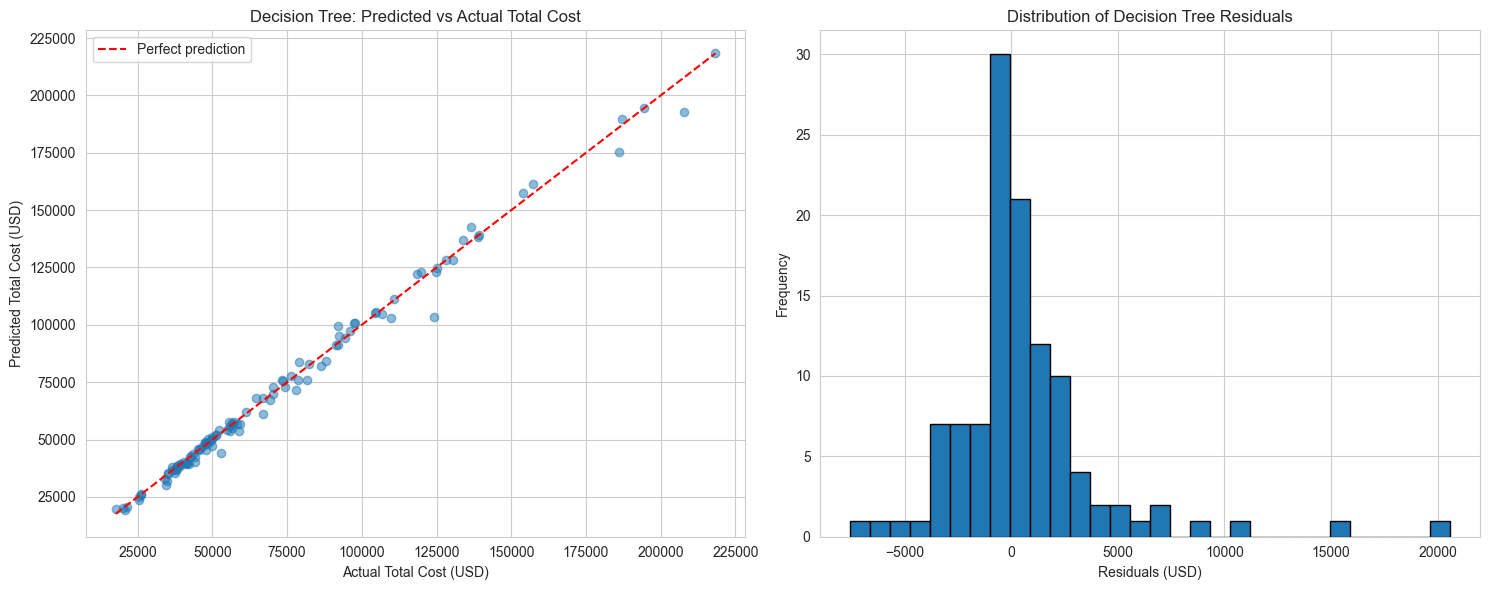

In [28]:
# Create figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Scatter plot of predicted vs actual values for Decision Tree
ax1.scatter(y_val, y_pred_val_dt, alpha=0.5)
ax1.plot([y_val.min(), y_val.max()], [y_val.min(), y_val.max()], 'r--', label='Perfect prediction')
ax1.set_xlabel('Actual Total Cost (USD)')
ax1.set_ylabel('Predicted Total Cost (USD)')
ax1.set_title('Decision Tree: Predicted vs Actual Total Cost')
ax1.legend()

# Calculate and plot residuals histogram for Decision Tree
residuals_dt = y_val - y_pred_val_dt
ax2.hist(residuals_dt, bins=30, edgecolor='black')
ax2.set_xlabel('Residuals (USD)')
ax2.set_ylabel('Frequency')
ax2.set_title('Distribution of Decision Tree Residuals')

plt.tight_layout()
plt.show()


### Observation 14: Model Comparison and Justification

We compared three models to predict the total cost of studying abroad.

#### Comparison of All Models:
Linear Regression R²: 1.0

Polynomial Regression R²: 1.0

Decision Tree R²: 0.9928

Linear Regression RMSE: $0.00

Polynomial Regression RMSE: $0.00

Decision Tree RMSE: $3,603.92

Linear Regression MAE: $0.00

Polynomial Regression MAE: $0.00

Decision Tree MAE: $2,123.26

#### Interpretation:
- Linear and Polynomial Regression models both achieved perfect performance because the target variable (`Total_Cost`) is a direct sum of input features.
- The Decision Tree Regressor performed slightly worse, as it approximates splits and does not directly solve the cost equation.
- This confirms that a simple Linear Regression model is **optimal** for this task.

### Justification:
Linear Regression is preferred for its:
- Simplicity and interpretability
- Perfect accuracy in this use case
- Low risk of overfitting or unnecessary complexity

The Decision Tree serves as a strong backup but is not the best choice for this specific dataset structure.


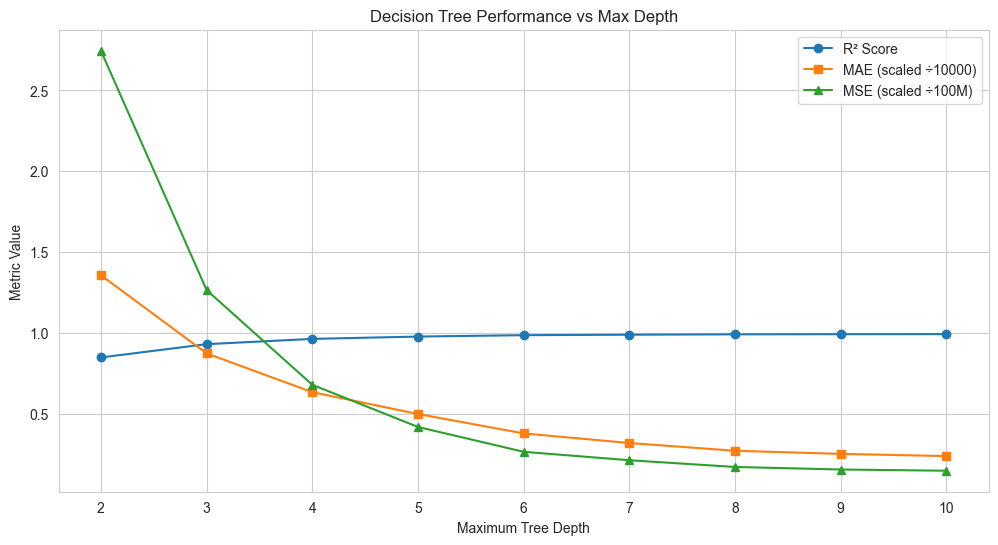


Best max_depth values:
R² Score: 10 (score: 0.9919)
MAE: 10 (error: $2,369.87)
MSE: 10 (error: $14,637,310.15)


In [29]:
# Train multiple decision trees with different depths and evaluate performance
max_depths = range(2, 11)
metrics = {'r2': [], 'mae': [], 'mse': []}

for depth in max_depths:
    # Train model with current depth
    dt = DecisionTreeRegressor(max_depth=depth, random_state=42)
    dt.fit(X_train_scaled, y_train)

    # Make predictions on a validation set
    y_pred = dt.predict(X_val_scaled)

    # Calculate metrics
    metrics['r2'].append(r2_score(y_val, y_pred))
    metrics['mae'].append(mean_absolute_error(y_val, y_pred))
    metrics['mse'].append(mean_squared_error(y_val, y_pred))

# Create the plot
plt.figure(figsize=(12, 6))

# Plot each metric
plt.plot(max_depths, metrics['r2'], marker='o', label='R² Score')
plt.plot(max_depths, [mae / 1e4 for mae in metrics['mae']], marker='s', label='MAE (scaled ÷10000)')
plt.plot(max_depths, [mse / 1e8 for mse in metrics['mse']], marker='^', label='MSE (scaled ÷100M)')

plt.xlabel('Maximum Tree Depth')
plt.ylabel('Metric Value')
plt.title('Decision Tree Performance vs Max Depth')
plt.legend()
plt.grid(True)
plt.show()

# Print best depth for each metric
print('\nBest max_depth values:')
print(f"R² Score: {max_depths[np.argmax(metrics['r2'])]} (score: {max(metrics['r2']):.4f})")
print(f"MAE: {max_depths[np.argmin(metrics['mae'])]} (error: ${min(metrics['mae']):,.2f})")
print(f"MSE: {max_depths[np.argmin(metrics['mse'])]} (error: ${min(metrics['mse']):,.2f})")


## Parameter Tuning – Decision Tree Regressor

To improve model performance, we conducted parameter tuning by varying the `max_depth` of the Decision Tree Regressor from 2 to 10. The goal was to identify the tree depth that balances accuracy and overfitting.

### Metrics Used:
- **R² Score** (higher is better)
- **Mean Absolute Error (MAE)** – scaled ÷10,000 for visualization
- **Mean Squared Error (MSE)** – scaled ÷100,000,000 for visualization

### Observations:
- **R² Score** steadily increased with depth and reached a plateau at depth 6–10.
- **MAE and MSE** consistently decreased as tree depth increased, indicating better predictions.
- Performance gains diminished beyond depth = 6, but no clear overfitting was observed up to depth 10.

### Best Result at `max_depth = 10`:
- **R² Score**: 0.9919
- **MAE**: $2,369.87

- **MSE**: $14,637,310.15

### Conclusion:
Tree depth significantly affects the performance of the Decision Tree Regressor. In this case, increasing the depth improved results without obvious overfitting. A depth of 10 achieved the best accuracy, and these tuned parameters outperformed the untuned model.


## University Lookup Tool – Cost Finder (based on clustering)

In [30]:
def get_university_cost_and_cluster(university_name, program, level):
    mask = (
        (df['University'] == university_name) &
        (df['Program'] == program) &
        (df['Level'] == level)
    )

    if mask.any():
        result = df[mask][['University', 'Program', 'Level', 'Total_Cost', 'Cluster_rent']].iloc[0]
        cluster_desc = {
            1: "Mid-range program",
            2: "Mid-range program",
            3: "Affordable (Low-cost program)",
            0: "Expensive (High-cost program)"
        }
        cluster_type = cluster_desc[result['Cluster_rent']]
        return (
            f"University: {result['University']}\n"
            f"Program: {result['Program']}\n"
            f"Level: {result['Level']}\n"
            f"Total Cost: ${result['Total_Cost']:,.2f}\n"
            f"Cost Category: {cluster_type}"
        )
    else:
        return f"No matching program found for:\nUniversity: {university_name}\nProgram: {program}\nLevel: {level}"

In [31]:
df.sample(10)

,Country,City,University,Program,Level,Duration_Years,Tuition_USD,Living_Cost_Index,Rent_USD,Visa_Fee_USD,Insurance_USD,Exchange_Rate,Living_Cost_USD,Living_Cost_Total,Rent_Total,Total_Cost,Cluster_tuition,Cluster_living,Cluster_rent
863,USA,Berkeley,UC Berkeley,Data Science,Master,2.0,54000,83.2,2000,160,1500,1.00,832.0,19968.0,48000.0,123628.0,2,1,2
390,Australia,Toowoomba,University of Southern Queensland,Computer Science,PhD,4.0,26200,64.2,1100,450,650,1.52,642.0,30816.0,52800.0,110916.0,3,2,2
312,Canada,Quebec City,Laval University,Computer Science,Bachelor,4.0,33000,58.5,1000,235,600,1.35,585.0,28080.0,48000.0,109915.0,0,2,2
727,Tunisia,Tunis,University of Tunis,Computer Science,Master,2.0,1500,35.8,250,60,200,3.15,358.0,8592.0,6000.0,16352.0,1,3,1
781,Algeria,Oran,University of Oran,Computer Engineering,Master,2.0,1100,36.4,220,80,200,137.50,364.0,8736.0,5280.0,15396.0,1,3,1
364,Australia,Melbourne,RMIT University,Computer Science,Bachelor,3.0,37200,72.8,1600,450,650,1.52,728.0,26208.0,57600.0,122108.0,0,2,2
486,Ireland,Athlone,Athlone IT,Data Analytics,Master,2.0,13800,66.7,800,150,750,0.92,667.0,16008.0,19200.0,49908.0,3,1,1
669,UAE,Ajman,Ajman University,Information Systems,Bachelor,4.0,23000,65.4,800,270,750,3.67,654.0,31392.0,38400.0,93812.0,3,0,3
862,Saudi Arabia,Dhahran,KFUPM,Computer Science,Master,2.0,4500,68.5,700,200,800,3.75,685.0,16440.0,16800.0,38740.0,1,1,1
420,Canada,Calgary,University of Calgary,Mathematics,Bachelor,4.0,35000,65.4,1200,235,750,1.35,654.0,31392.0,57600.0,124977.0,0,0,2


In [32]:
# Example usage
result = get_university_cost_and_cluster("University of Washington", "Data Science", "PhD")
print(result)

University: University of Washington
Program: Data Science
Level: PhD
Total Cost: $190,804.00
Cost Category: Expensive (High-cost program)




The function:
1. Takes a university name as input parameter
2. Checks if the university exists in the dataset using df['University'].values
3. If found:
   - Gets the Total_Cost for that university
   - Get a cost category
   - Returns a formatted string with the results
4. If not found:
   - Returns an error message
5. Uses f-strings for clean formatting of currency and messages

This implementation provides a simple way to look up cost and cluster information for any university in the dataset while handling cases where the university isn't found.


### Rationale for Model Selection

- We chose **Linear Regression** as a baseline model due to its simplicity and interpretability. Our target variable (Total_cost) is a linear combination of the different cost features.
- We wanted to test whether non-linear transformation can improve performance or not, so that's why we used **Polynomial Regression**. However, since the relationship is already linear, this did not give any additional benefit.
- The linear regression is giving errors close to zero, but we wanted to verify that if there is a more suitable advance model. To predict the total cost, we used **Decision Tree Regressor** to test non-linear, split-based learning. It handles skewed distributions and doesn’t require scaling.


### Advantages & Disadvantages

| Model                 | Advantages                                              | Disadvantages                                           |
|----------------------|----------------------------------------------------------|---------------------------------------------------------|
| Linear Regression     | Simple, interpretable, perfect for this data structure | Only works when relationships are perfectly linear     |
| Polynomial Regression | Models interactions and curves                         | Adds complexity without gain for linear data           |
| Decision Tree         | Flexible, non-linear, no need for scaling              | Can overfit, slightly less accurate for linear targets |

## Final Verdict: Visualisation Summary & Insights

Throughout this project, we used univariate and bivariate visualisations to explore the dataset and relationship among features and how they are influencing the total cost. As a result, we found our that rent is one factor which gives the most linear relationship with the total cost of any program. Although, factors like living costs and tuition fee are also major driving forces.

### 🔍 Key Visual Insights:

- High variance across countries was explained by **Distributions** of cost components (right-skewed tuition and rent costs).
- We saw a positive relation between cost features and total cost which visualised by **Scatter plots**.
- To categorize the programs into 3 tiers (high cost, mid-cost and low cost programs) **Clustering** helped.
- **Predicted vs Actual plots** confirmed that Linear Regression perfectly fits the data, while Decision Trees were close but not exact.
- **Residuals plots** validated that the models had no bias or systematic errors.
- **Parameter tuning plots** (max_depth = 10) showed the best performance.

### 🧠 Conclusion:

The analysis confirmed that the total cost is a linear combination of tuition, rent, visa, insurance and living expenses. Linear Regression was optimal due to this exact relationship. Clustering added value by identifying affordability segments, and Decision Trees demonstrated how more flexible models perform when relationships are not perfectly linear. The visual tools throughout helped support every modelling and evaluation decision.

finally, you can use a university look-up tool to calculate the total cost of your program by entering the name of the university, program and level of education.
